In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt      
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### DATA PREPARATION

In [2]:
url21="https://www.basketball-reference.com/leagues/NBA_2021_per_game.html"
url20="https://www.basketball-reference.com/leagues/NBA_2020_per_game.html"
url19="https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"
url18="https://www.basketball-reference.com/leagues/NBA_2018_per_game.html"
url17="https://www.basketball-reference.com/leagues/NBA_2017_per_game.html"
url16="https://www.basketball-reference.com/leagues/NBA_2016_per_game.html"
url15="https://www.basketball-reference.com/leagues/NBA_2015_per_game.html"
url14="https://www.basketball-reference.com/leagues/NBA_2014_per_game.html"
url13="https://www.basketball-reference.com/leagues/NBA_2013_per_game.html"
url12="https://www.basketball-reference.com/leagues/NBA_2012_per_game.html"
url11="https://www.basketball-reference.com/leagues/NBA_2011_per_game.html"
url10="https://www.basketball-reference.com/leagues/NBA_2010_per_game.html"

In [3]:
html21 = requests.get(url21)
html20 = requests.get(url20)
html19 = requests.get(url19)
html18 = requests.get(url18)
html17 = requests.get(url17)
html16 = requests.get(url16)
html15 = requests.get(url15)
html14 = requests.get(url14)
html13 = requests.get(url13)
html12 = requests.get(url12)
html11 = requests.get(url11)
html10 = requests.get(url10)

In [4]:
soup1=BeautifulSoup(html21.content,"html.parser")
soup2=BeautifulSoup(html20.content,"html.parser")
soup3=BeautifulSoup(html19.content,"html.parser")
soup4=BeautifulSoup(html18.content,"html.parser")
soup5=BeautifulSoup(html17.content,"html.parser")
soup6=BeautifulSoup(html16.content,"html.parser")
soup7=BeautifulSoup(html15.content,"html.parser")
soup8=BeautifulSoup(html14.content,"html.parser")
soup9=BeautifulSoup(html13.content,"html.parser")
soup10=BeautifulSoup(html12.content,"html.parser")
soup11=BeautifulSoup(html11.content,"html.parser")
soup12=BeautifulSoup(html10.content,"html.parser")

In [5]:
tbl1=soup1("table",attrs={"class":"sortable"}) [0]
tbl2=soup2("table",attrs={"class":"sortable"}) [0]
tbl3=soup3("table",attrs={"class":"sortable"}) [0]
tbl4=soup4("table",attrs={"class":"sortable"}) [0]
tbl5=soup5("table",attrs={"class":"sortable"}) [0]
tbl6=soup6("table",attrs={"class":"sortable"}) [0]
tbl7=soup7("table",attrs={"class":"sortable"}) [0]
tbl8=soup8("table",attrs={"class":"sortable"}) [0]
tbl9=soup9("table",attrs={"class":"sortable"}) [0]
tbl10=soup10("table",attrs={"class":"sortable"}) [0]
tbl11=soup11("table",attrs={"class":"sortable"}) [0]
tbl12=soup12("table",attrs={"class":"sortable"}) [0]

In [6]:
df=pd.DataFrame()
df = df.rename(columns={'Player''s age on February 1 of the season': 'age'})

In [7]:
tables = [tbl1,tbl2,tbl3,tbl4,tbl5,tbl6,tbl7,tbl8,tbl9,tbl10,tbl11,tbl12]

In [8]:
def get_df(tables): 
    
    dfs = []
    
    year = 21
    for table in tables:
        Player=list()
        Position=list()
        age=list()
        Team=list()
        Games=list()
        Games_Started=list()
        Minutes_Played_Per_Game=list()
        Field_Goals_Per_Game=list()
        Field_Goal_Attempts_Per_Game=list()
        Field_Goal_Percentage=list()
        three_Point_Field_Goals_Per_Game=list()
        three_Point_Field_attemps_Goal_Percentage=list()
        three_Point_Field_Goal_Percentage=list()
        two_Point_Field_Goals_Per_Game=list()
        two_Point_Field_Goal_Attempts_Per_Game=list()
        two_Point_Field_Goal_Percentage=list()
        Effective_Field_Goal_Percentage=list()
        Free_Throws_Per_Game=list()
        Free_Throws_attemps_Per_Game=list()
        Free_Throws_Percentage=list()
        Offensive_Rebounds_Per_Game=list()
        Defensive_Rebounds_Per_Game=list()
        Total_Rebounds_Per_Game=list()
        Assists_Per_Game=list()
        Steals_Per_Game=list()
        Blocks_Per_Game=list()
        Turnovers_Per_Game=list()
        Personal_Fouls_Per_Game=list()
        Points_Per_Game=list()


        for row in table("tr"):
            cells=row("td")
            if(len(cells)<29):
                     continue      
            Player.append(cells[0].get_text())   
            Position.append(cells[1].get_text())
            age.append(cells[2].get_text())   
            Team.append(cells[3].get_text())   
            Games.append(cells[4].get_text()) 
            Games_Started.append(cells[5].get_text())   
            Minutes_Played_Per_Game.append(cells[6].get_text())   
            Field_Goals_Per_Game.append(cells[7].get_text())   
            Field_Goal_Attempts_Per_Game.append(cells[8].get_text())   
            Field_Goal_Percentage.append(cells[9].get_text())   
            three_Point_Field_Goals_Per_Game.append(cells[10].get_text())
            three_Point_Field_attemps_Goal_Percentage.append(cells[11].get_text())   
            three_Point_Field_Goal_Percentage.append(cells[12].get_text())   
            two_Point_Field_Goals_Per_Game.append(cells[13].get_text())   
            two_Point_Field_Goal_Attempts_Per_Game.append(cells[14].get_text()) 
            two_Point_Field_Goal_Percentage.append(cells[15].get_text()) 
            Effective_Field_Goal_Percentage.append(cells[16].get_text())   
            Free_Throws_Per_Game.append(cells[17].get_text())
            Free_Throws_attemps_Per_Game.append(cells[18].get_text())
            Free_Throws_Percentage.append(cells[19].get_text())
            Offensive_Rebounds_Per_Game.append(cells[20].get_text())   
            Defensive_Rebounds_Per_Game.append(cells[21].get_text())   
            Total_Rebounds_Per_Game.append(cells[22].get_text())   
            Assists_Per_Game.append(cells[23].get_text())   
            Steals_Per_Game.append(cells[24].get_text())   
            Blocks_Per_Game.append(cells[25].get_text())   
            Turnovers_Per_Game.append(cells[26].get_text())   
            Personal_Fouls_Per_Game.append(cells[27].get_text())   
            Points_Per_Game.append(cells[28].get_text()) 

            df1=pd.DataFrame({"Player":Player,"Position":Position,"age":age,"Team":Team,"Games":Games,"Gstart":Games_Started,
                     "Minutes":Minutes_Played_Per_Game,"Field-Per-Game":Field_Goals_Per_Game,
                     "Field-Attempts":Field_Goal_Attempts_Per_Game,"Field_Goal_Percentage":Field_Goal_Percentage,
                     "three_Point_Field_Goals_Per_Game":three_Point_Field_Goals_Per_Game,"three_Point_Field_attemps_Goal_Percentage":three_Point_Field_attemps_Goal_Percentage,
                     "three_Point_Field_Goal_Percentage":three_Point_Field_Goal_Percentage,"two_Point_Field_Goals_Per_Game":two_Point_Field_Goals_Per_Game,
                     "two_Point_Field_Goal_Attempts_Per_Game":two_Point_Field_Goal_Attempts_Per_Game,"two_Point_Field_Goal_Percentage":two_Point_Field_Goal_Percentage,
                     "Effective_Field_Goal_Percentage":Effective_Field_Goal_Percentage,"Free_Throws_Per_Game":Free_Throws_Per_Game,"Free_Throws_attemps_Per_Game":Free_Throws_attemps_Per_Game,
                     "Free_Throws_Percentage":Free_Throws_Percentage,"Offensive_Rebounds_Per_Game":Offensive_Rebounds_Per_Game,"Defensive_Rebounds_Per_Game":Defensive_Rebounds_Per_Game,
                     "Total_Rebounds_Per_Game":Total_Rebounds_Per_Game,"Assists_Per_Game":Assists_Per_Game,"Steals_Per_Game":Steals_Per_Game,"Blocks_Per_Game":Blocks_Per_Game,
                     "Turnovers_Per_Game":Turnovers_Per_Game,"Personal_Fouls_Per_Game":Personal_Fouls_Per_Game,"Points_Per_Game":Points_Per_Game})

        df1['season'] = str(year)
        year -= 1
        dfs.append(df1)
    data = pd.concat(dfs, ignore_index=True)
    return data

In [9]:
data = get_df(tables)

In [10]:
data['target'] = 0

In [11]:
data.shape

(7490, 31)

### CREATING ALLSTAR DATA

In [12]:
def read_east_csv(year):
    east_df = []
    for i in year:
        i = str(i)
        df = pd.read_csv(f'East{i}.csv')
        df = df.rename(columns={'Unnamed: 0': 'Player'})
        df['AS_year'] = i
        east_df.append(df)
    return east_df   

def read_west_csv(year):
    west_df = []
    for i in year:
        i = str(i)
        df = pd.read_csv(f'West{i}.csv')
        df = df.rename(columns={'Unnamed: 0': 'Player'})
        df['AS_year'] = i
        west_df.append(df)
        
    return west_df 
        

In [13]:
years = list(range(10,22))
west = read_west_csv(years)
east = read_east_csv(years)
west = pd.concat(west)
east = pd.concat(east)

In [14]:
all_stardf = pd.concat([west,east])

In [15]:
all_stardf.drop(all_stardf.columns.difference(['Player','AS_year']), axis = 1, inplace=True)

In [16]:
all_stardf = all_stardf[~all_stardf['Player'].isin(['Starters','Reserves','Team Totals'])]

In [17]:
all_stardf = all_stardf.rename(columns={'AS_year': 'season'})

In [18]:
all_stardf['season'] = all_stardf['season'].astype(int)
data['season'] = data['season'].astype(int)

In [19]:
all_stardf.reset_index(inplace=True)

In [20]:
all_stardf.drop('index',axis=1,inplace =True)

In [21]:
all_stardf.dropna(inplace=True)

In [22]:
all_stardf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  287 non-null    object
 1   season  287 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


### UPDATE TARGET COL BASED ON ALLSTAR DF PLAYER NAME + SEASON 

In [23]:
for i,v in all_stardf.iterrows():
    data.loc[(data['Player'] == v['Player']) & (data['season'] == v['season']), 'target'] = 1

In [24]:
data.drop_duplicates(keep='last',inplace=True)

In [25]:
data.to_csv('all_combine_data.csv', index=False)

### IMPORT DATA

In [26]:
data = pd.read_csv('all_combine_data.csv') 
df = data.copy()

**checklist for EDA**
* [ ] read data dictionary and make some assumptions about the data
* [ ] import data
* [ ] check the shape
* [ ] data head
* [ ] view info for dtype and missing value
* [ ] check/make sure for missing value 
* [ ] check statistical info 
* [ ] data integrity 
* [ ] divide columns dtypes and check distribution + target
* [ ] vizualisation for outliers only if needed 
* [ ] write insight based on step 1 


In [27]:
df.shape

(7490, 31)

In [28]:
df.head()

,Player,Position,age,Team,Games,Gstart,Minutes,Field-Per-Game,Field-Attempts,Field_Goal_Percentage,...,Defensive_Rebounds_Per_Game,Total_Rebounds_Per_Game,Assists_Per_Game,Steals_Per_Game,Blocks_Per_Game,Turnovers_Per_Game,Personal_Fouls_Per_Game,Points_Per_Game,season,target
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,21,0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,...,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,21,0
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,21,0
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,21,0
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,21,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Player                                     7490 non-null   object 
 1   Position                                   7490 non-null   object 
 2   age                                        7490 non-null   int64  
 3   Team                                       7490 non-null   object 
 4   Games                                      7490 non-null   int64  
 5   Gstart                                     7490 non-null   int64  
 6   Minutes                                    7490 non-null   float64
 7   Field-Per-Game                             7490 non-null   float64
 8   Field-Attempts                             7490 non-null   float64
 9   Field_Goal_Percentage                      7452 non-null   float64
 10  three_Point_Field_Goals_

Field_Goal_Percentage                 38
three_Point_Field_Goal_Percentage    859
two_Point_Field_Goal_Percentage       84
Effective_Field_Goal_Percentage       38
Free_Throws_Percentage               365
dtype: int64

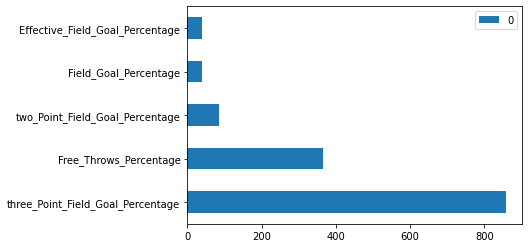

In [30]:
mv = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)) #create df of missing values
mv.loc[mv[0] > 0].plot.barh()


missing = df.isna().sum()
missing[missing > 0]

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7490.0,26.384379,4.147281,19.0,23.000,26.000,29.000,43.0
Games,7490.0,44.520027,25.608319,1.0,22.000,47.000,67.000,83.0
Gstart,7490.0,20.606142,26.251091,0.0,0.000,6.000,36.000,82.0
Minutes,7490.0,19.448745,9.368433,0.0,12.000,19.000,27.100,42.0
Field-Per-Game,7490.0,2.981495,2.094391,0.0,1.400,2.500,4.200,11.2
Field-Attempts,7490.0,6.665834,4.423161,0.0,3.200,5.700,9.200,24.5
Field_Goal_Percentage,7452.0,0.437136,0.104826,0.0,0.396,0.437,0.484,1.0
three_Point_Field_Goals_Per_Game,7490.0,0.705113,0.739837,0.0,0.000,0.500,1.100,5.3
three_Point_Field_attemps_Goal_Percentage,7490.0,2.025167,1.928834,0.0,0.300,1.600,3.200,13.2
three_Point_Field_Goal_Percentage,6631.0,0.296158,0.148969,0.0,0.250,0.333,0.375,1.0


#### DATAA INTEGRITY
- age cannot be negative
- number of point cannot be negative
- season between 10 and 21

In [34]:
assert(df['age'].all() > 0)
assert(df['Points_Per_Game'].any() > 0)

### DEVIDE TO CATEGORICAL AND NUMERICAL

In [35]:
g = df.columns.to_series().groupby(df.dtypes).groups
g = {k.name: v for k , v in g.items()}

cat_feature = g['object'].to_list()
num_feature_f = g['float64'].to_list()
num_feature_i = g['int64'].to_list()
num_feature = num_feature_f+num_feature_i

#### check that the data shape remain the same

In [36]:
assert(len(num_feature)+len(cat_feature) == df.shape[1])

#### check for correlation

In [37]:
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.4 \
        else 'black'
    return 'color: %s' % color

corr = df.corr()
corr.style.applymap(color_map)

,age,Games,Gstart,Minutes,Field-Per-Game,Field-Attempts,Field_Goal_Percentage,three_Point_Field_Goals_Per_Game,three_Point_Field_attemps_Goal_Percentage,three_Point_Field_Goal_Percentage,two_Point_Field_Goals_Per_Game,two_Point_Field_Goal_Attempts_Per_Game,two_Point_Field_Goal_Percentage,Effective_Field_Goal_Percentage,Free_Throws_Per_Game,Free_Throws_attemps_Per_Game,Free_Throws_Percentage,Offensive_Rebounds_Per_Game,Defensive_Rebounds_Per_Game,Total_Rebounds_Per_Game,Assists_Per_Game,Steals_Per_Game,Blocks_Per_Game,Turnovers_Per_Game,Personal_Fouls_Per_Game,Points_Per_Game,season,target
age,1.000000,0.048582,0.047809,0.110593,0.035682,0.041771,0.001774,0.110624,0.097416,0.073807,-0.003955,-0.000740,-0.020074,0.047774,0.014220,-0.004865,0.091334,-0.024895,0.075144,0.047103,0.109626,0.043473,-0.012884,0.034845,0.064401,0.043412,-0.070195,0.026124
Games,0.048582,1.000000,0.636958,0.615478,0.525124,0.501300,0.255762,0.317361,0.298110,0.114966,0.483524,0.472893,0.193092,0.278509,0.402243,0.404241,0.183980,0.311076,0.462977,0.441025,0.349116,0.436830,0.283710,0.417747,0.483960,0.513933,-0.099259,0.190025
Gstart,0.047809,0.636958,1.000000,0.776404,0.722414,0.698944,0.205418,0.378553,0.369180,0.089100,0.689408,0.685364,0.148914,0.198607,0.599220,0.607121,0.154955,0.413865,0.639766,0.604236,0.511414,0.581633,0.386652,0.619873,0.551269,0.709571,-0.056332,0.359249
Minutes,0.110593,0.615478,0.776404,1.000000,0.889354,0.897177,0.215626,0.580346,0.587490,0.191515,0.801559,0.816822,0.164070,0.256832,0.729655,0.729869,0.272004,0.418266,0.724358,0.667837,0.665487,0.748096,0.383962,0.780273,0.718612,0.886403,-0.028980,0.317602
Field-Per-Game,0.035682,0.525124,0.722414,0.889354,1.000000,0.977134,0.289251,0.559530,0.558805,0.177021,0.939599,0.934637,0.227342,0.295148,0.838045,0.833585,0.273738,0.418544,0.714918,0.660940,0.643607,0.656716,0.379729,0.812390,0.614660,0.988518,0.033943,0.454977
Field-Attempts,0.041771,0.501300,0.698944,0.897177,0.977134,1.000000,0.145648,0.640607,0.658398,0.197854,0.879551,0.908437,0.109111,0.185507,0.830066,0.811664,0.313132,0.313273,0.650463,0.579485,0.683514,0.677134,0.288761,0.824714,0.581321,0.980565,0.027029,0.430405
Field_Goal_Percentage,0.001774,0.255762,0.205418,0.215626,0.289251,0.145648,1.000000,-0.061253,-0.130460,0.149764,0.363433,0.257736,0.827736,0.914157,0.186138,0.226768,-0.073415,0.412521,0.338486,0.382535,0.034260,0.116130,0.365796,0.151558,0.325068,0.244845,0.026749,0.083336
three_Point_Field_Goals_Per_Game,0.110624,0.317361,0.378553,0.580346,0.559530,0.640607,-0.061253,1.000000,0.979134,0.493682,0.242756,0.272387,-0.006265,0.219582,0.405866,0.335304,0.374184,-0.204624,0.206226,0.085155,0.478822,0.448089,-0.094273,0.430758,0.249848,0.626928,0.209695,0.221979
three_Point_Field_attemps_Goal_Percentage,0.097416,0.298110,0.369180,0.587490,0.558805,0.658398,-0.130460,0.979134,1.000000,0.419393,0.250086,0.283638,-0.010947,0.137220,0.422059,0.352009,0.374743,-0.218485,0.203628,0.078772,0.502869,0.468210,-0.105695,0.454662,0.251035,0.627472,0.226495,0.219719
three_Point_Field_Goal_Percentage,0.073807,0.114966,0.089100,0.191515,0.177021,0.197854,0.149764,0.493682,0.419393,1.000000,0.003615,0.020944,-0.059981,0.424491,0.082949,0.036639,0.247517,-0.242039,-0.014967,-0.087990,0.179627,0.133992,-0.146091,0.101464,0.014534,0.211069,0.103255,0.044034


In [38]:
def get_kde_target(df):
    target = 'target'
   
    for i in ['Minutes','Field-Per-Game','three_Point_Field_Goal_Percentage',\
                               'Points_Per_Game']:
        fig,ax = plt.subplots(figsize = (30,10))
        sns.kdeplot(data = df ,x=i, hue = target)
        ax.set_title('{} X {}'.format(i,target))
            
    plt.show()


In [39]:
def get_outlier_target(df,num_feature):
    target = 'target'
   
    for i in num_feature:
        fig,ax = plt.subplots(figsize = (30,10))
        if i != target:
            sns.boxplot(x=i, y=target, orient="h", data=df, palette="Set1", width=0.5)
            ax.set_title('{} X {}'.format(i,target))
            
            plt.show()



#### VISUALIZATION

- check for the distribution of the feature vs the target variable
- check for outliers

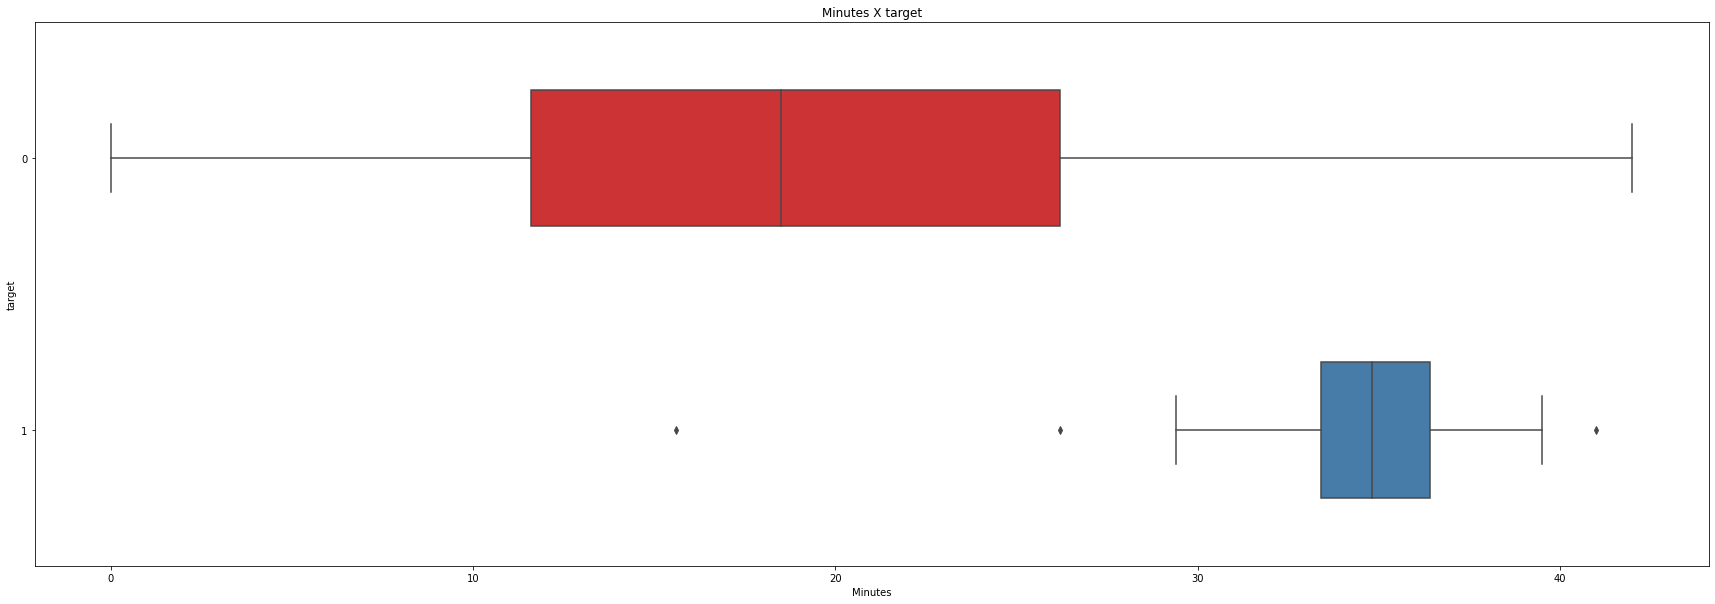

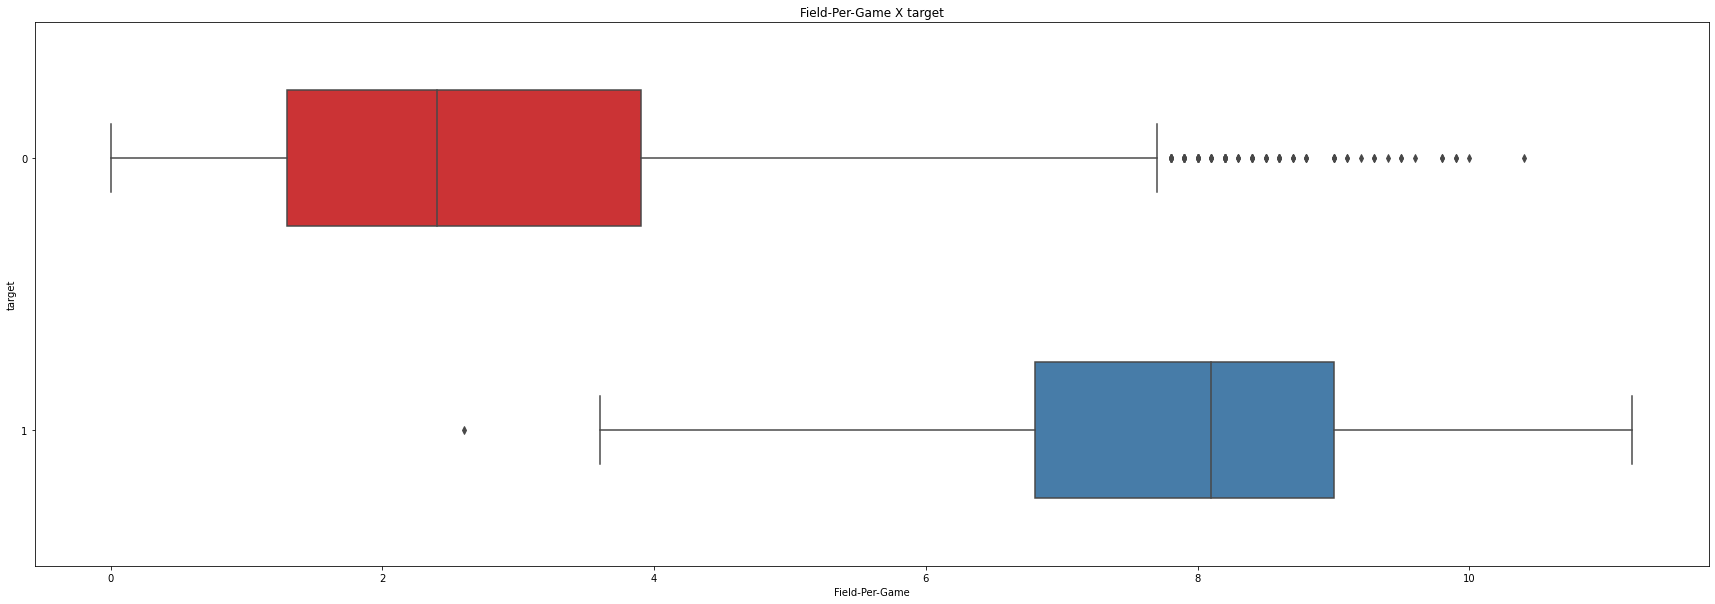

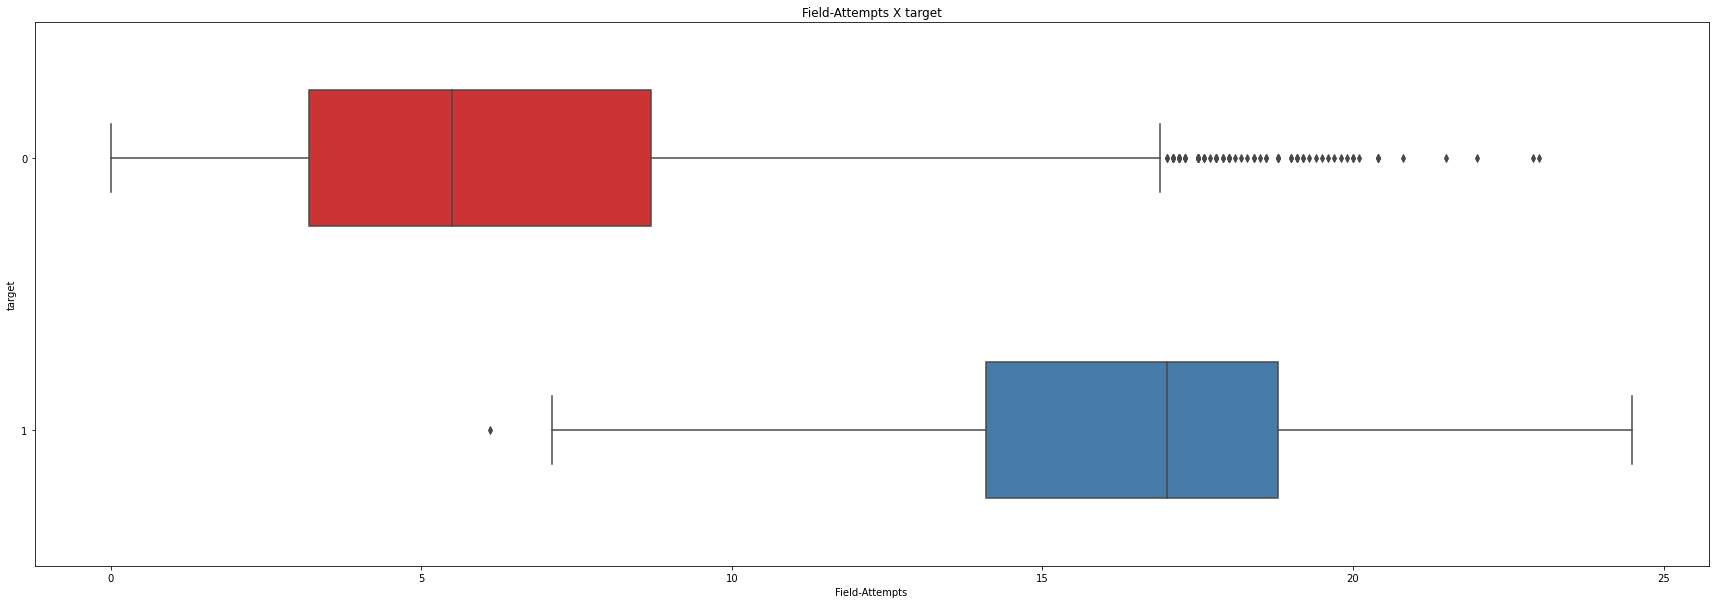

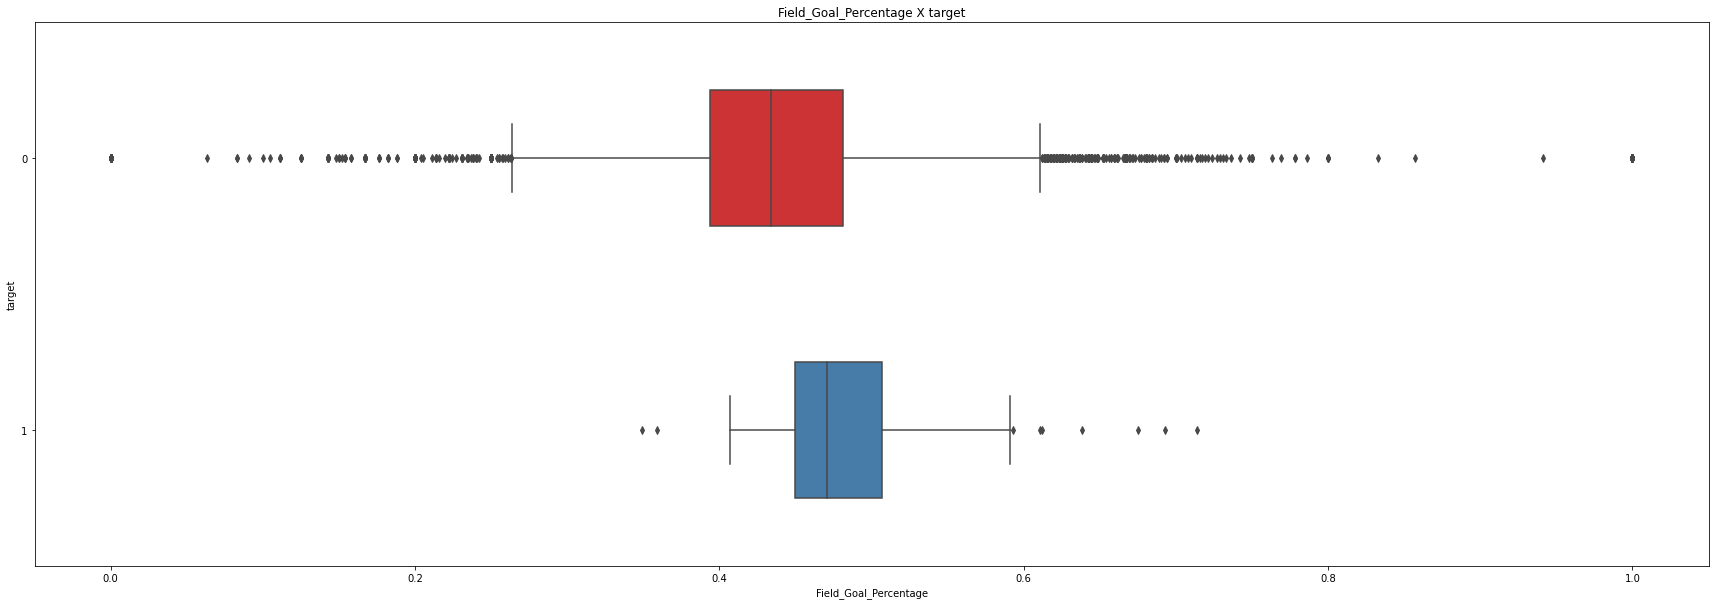

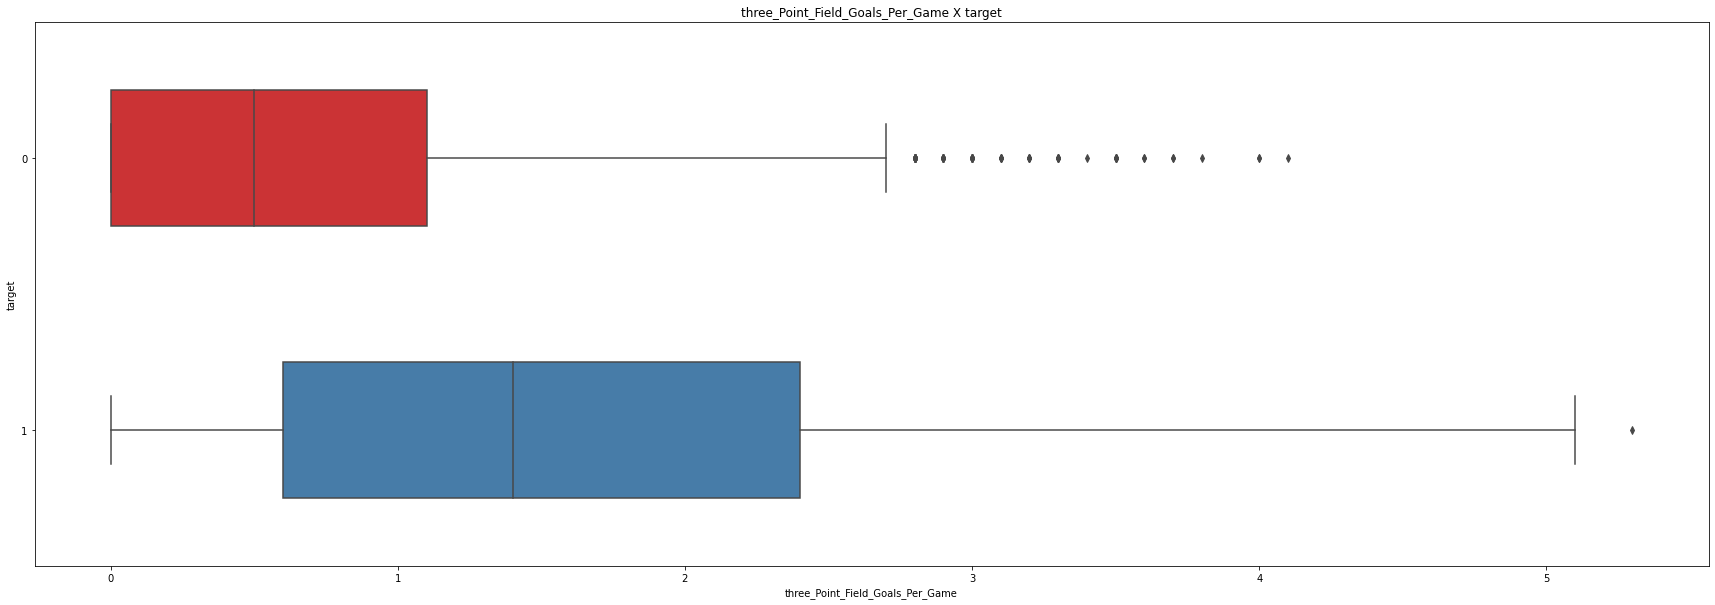

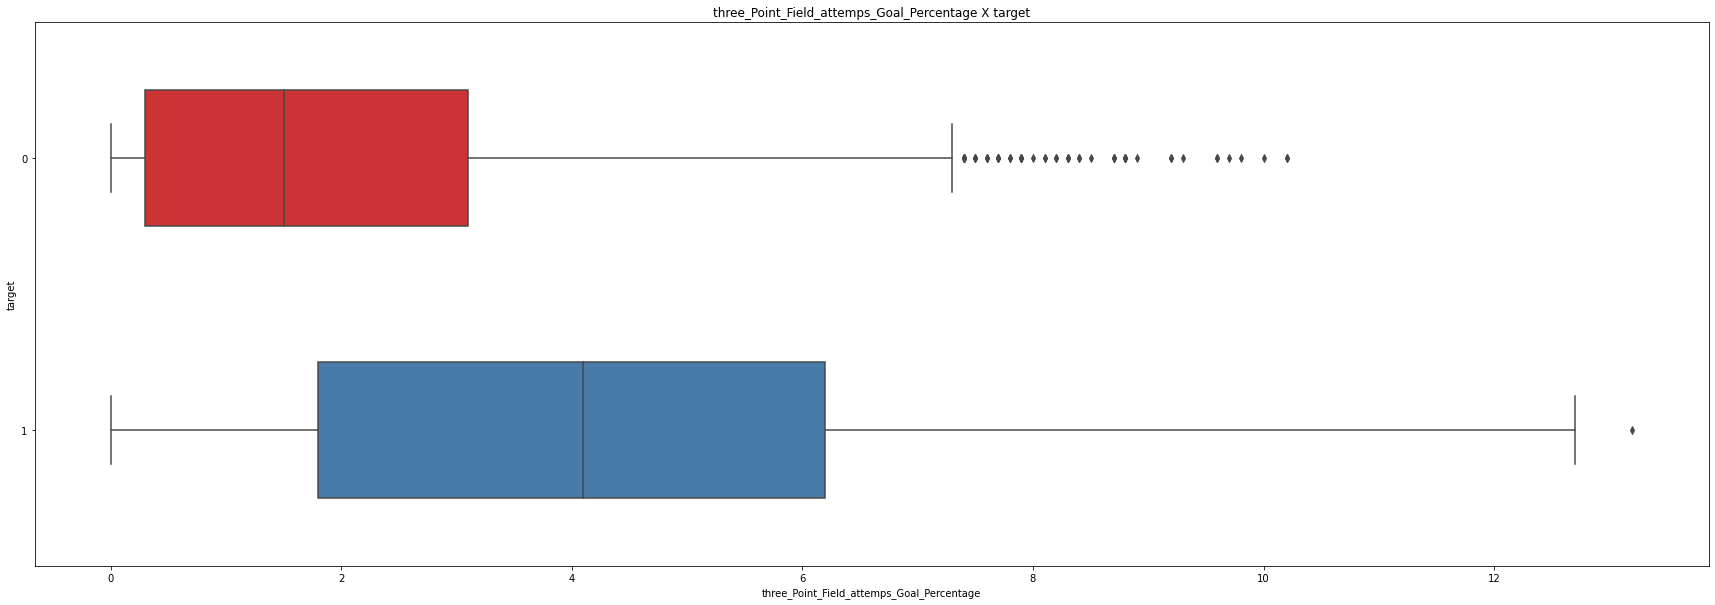

In [40]:
get_outlier_target(df,num_feature[:6])

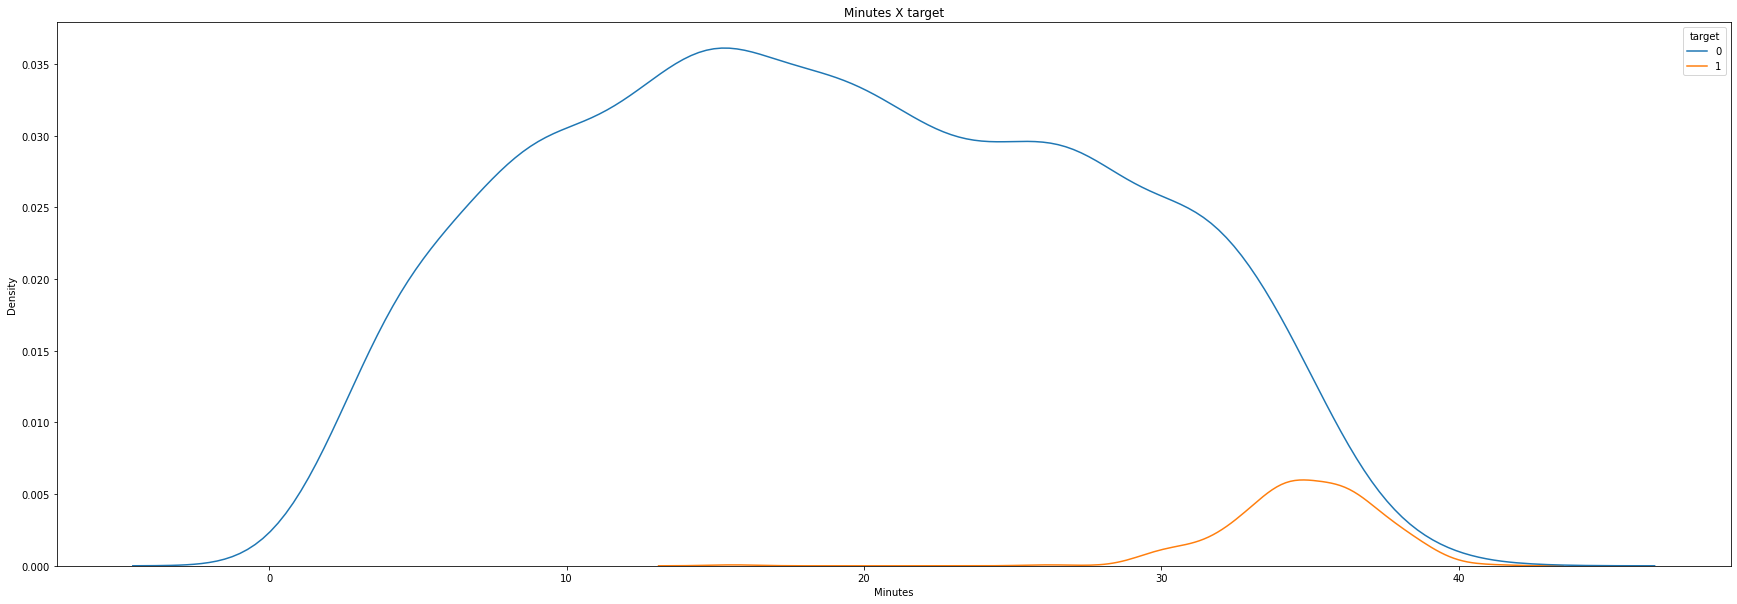

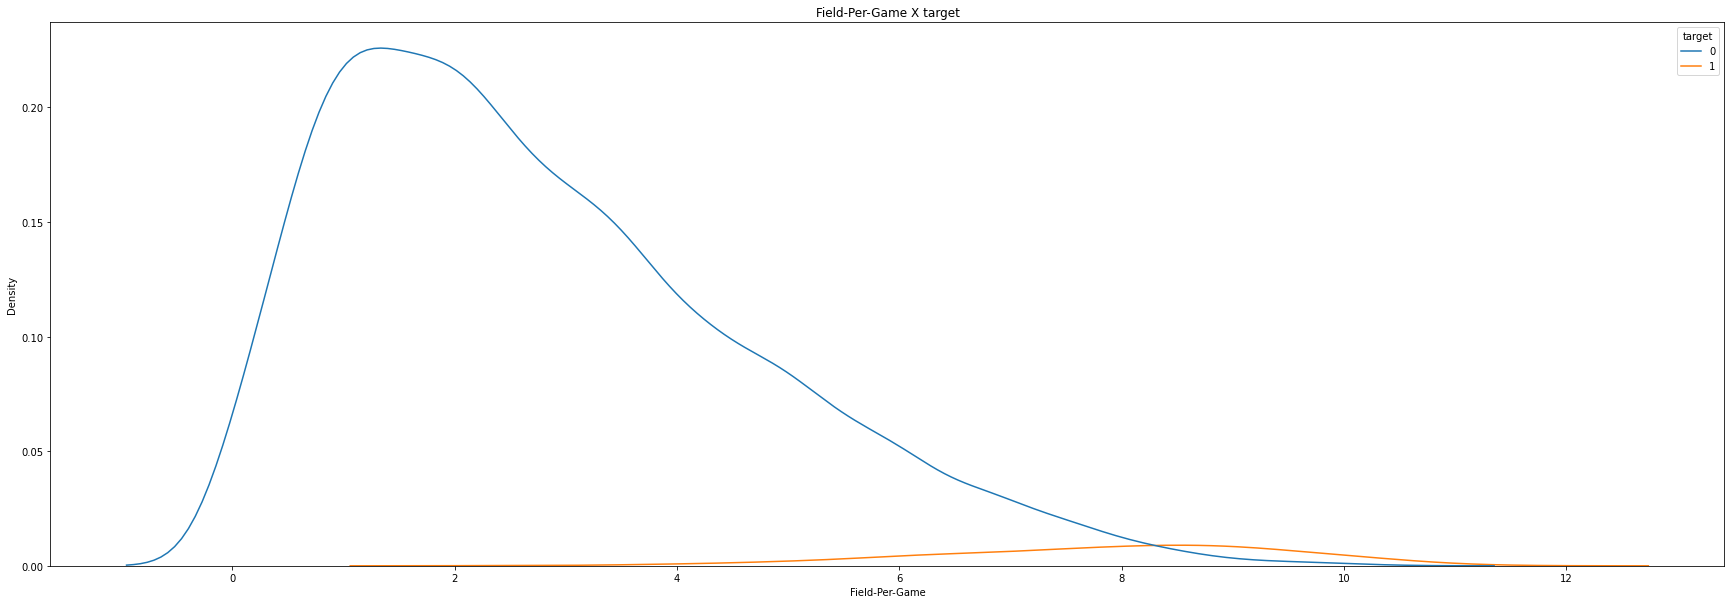

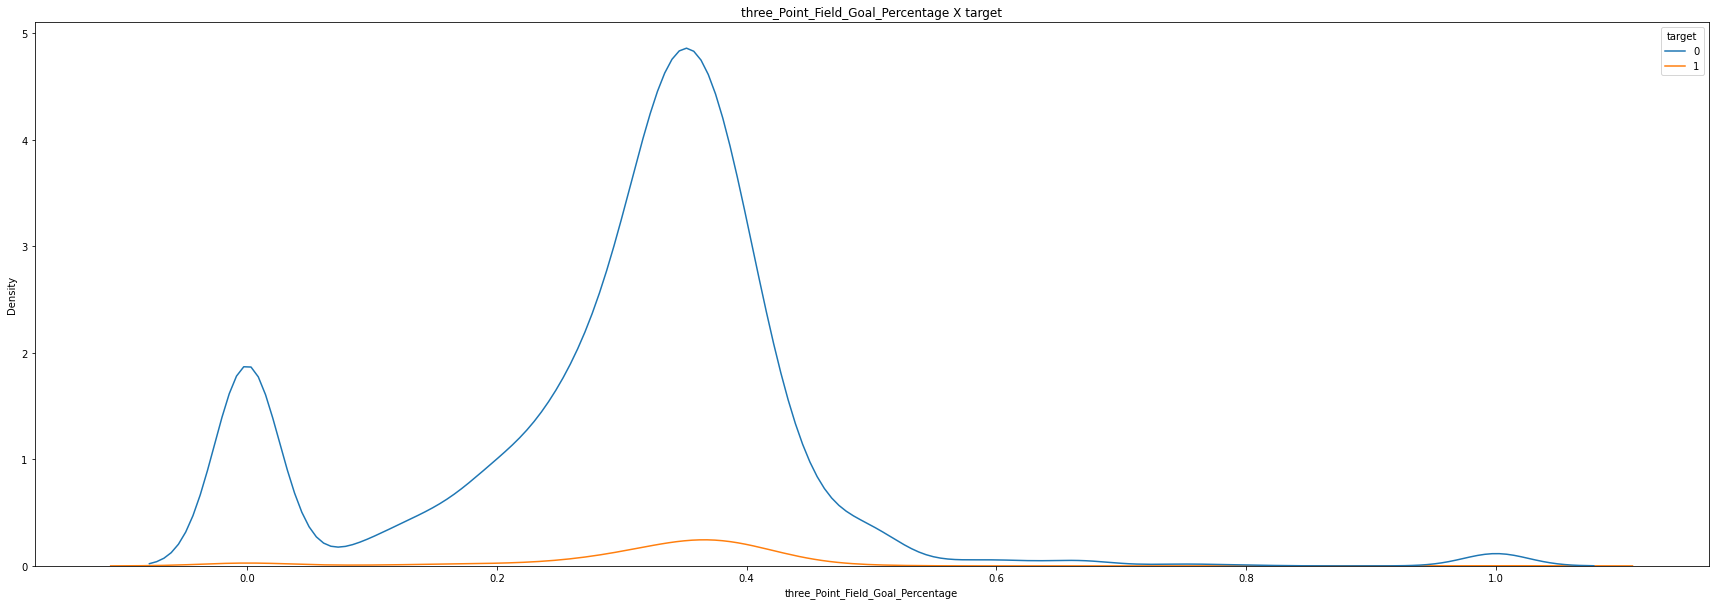

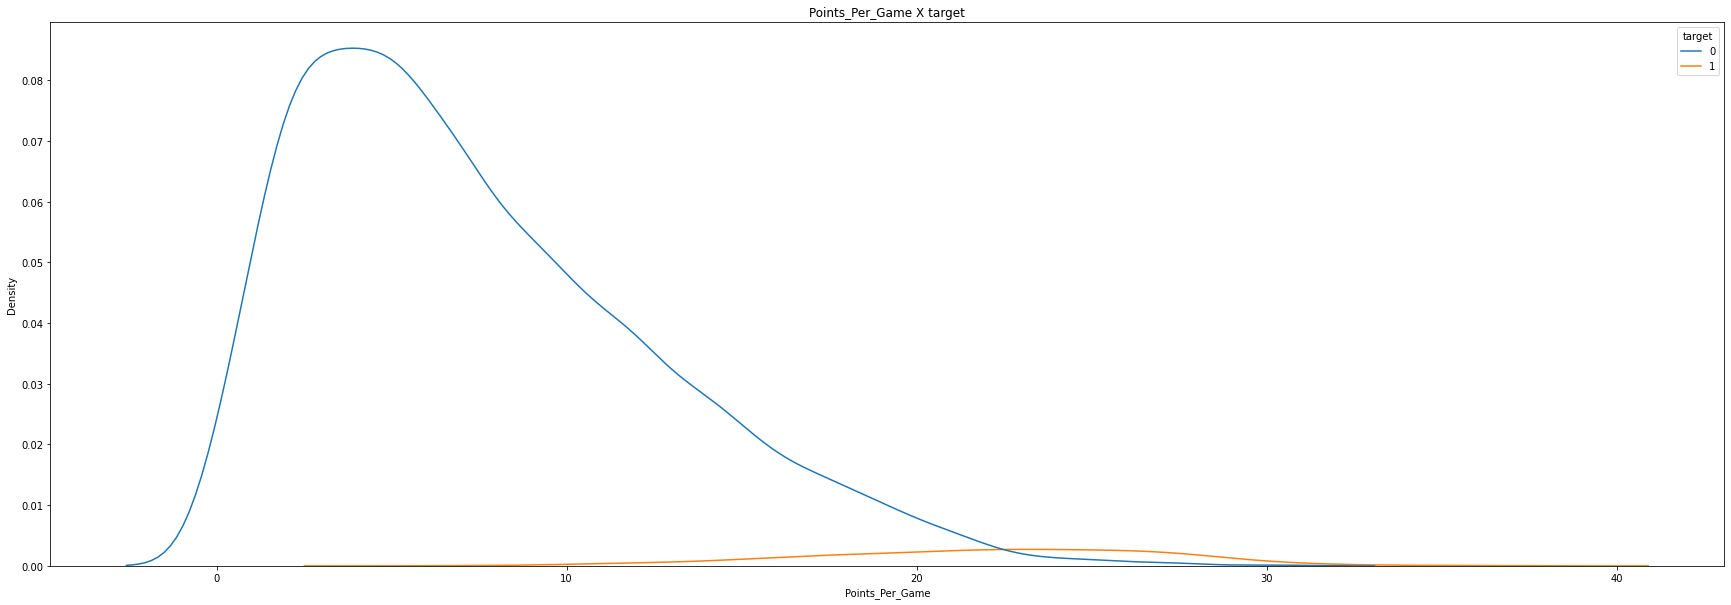

In [41]:
get_kde_target(df)

**checklist for EDA**
* [x] read data dictionary and make some assumptions about the data
* [x] import data
* [x] check the shape
* [x] data head
* [x] view info for dtype and missing value
* [x] check/make sure for missing value 
* [x] check statistical info 
* [x] data integrity 
* [x] divide columns dtypes and check distribution + target
* [x] vizualisation for outliers only if needed 
* [x] write insight based on step 1 


### INSIGHTS

- data shape after adding the target is **(7490, 31)** : 
- there's 28 numerical and 3 categorical
- missing data: we fount multiple feature having missing data
- data integrity - we check that the data make sense by making sure we have no negative age or point per game,
- viz
- `all star players vs regular player`:we can observe some patern regarding allstar player , they play most of the time,more minutes having more points per game which make sense since thats whats good player do during the season
- as for `outlier` we choose to use the oultlier. the reason for that is that **allstar** by definition are the outliers of the league, the player that have more points then a regular player so by using them the model might take advantage and give us higher accuracy score
- `baseline` our baseline is 96% accuracy, due to the fact that the data is severely inbalance (96,4)% buy choosing randomly a player with 0 (no alstar) we will be correct 96% of the time so in order to get a good model the accuracy must be higher then 96%

### PRE_PROCESSING STEPS
- missing data : fill null values with the mean in order to remain with the same distribution (by fill null using 0's we will change the distn)
- most of the all star players are outliers- we do not touch them
- oversampling the minority class since we have only 3% of allstars
- drop columns with very high corr
- drop nominal features(player name)
- converting categorical data since model cannot works with 
- scalling data not needed because rf doesnt require(decision tree baseed)

### MODEL
- we choosed to use randomforest which is based on decision tree , high accuracy, no preprocessing needed 

### METRICS
- in order to make sure we have good resut:
- `recall`,`precision` and `accuracy score` : since thats a classification problem, regression metrics such as r2 rmse will not be a good fit for us, recall and precision will tell us how many we predict corectly the target and what is the accuracy

## PREPROCESSING STEPS

In [46]:
for col in num_feature:
    m = df[col].mean()
    df[col].fillna(m,inplace=True)

In [47]:
assert(df.isna().sum().sum() == 0)

In [48]:
drops_high_corr = ['Effective_Field_Goal_Percentage','two_Point_Field_Goal_Attempts_Per_Game','Free_Throws_attemps_Per_Game']

In [49]:
df.drop(drops_high_corr,axis=1,inplace=True)

In [50]:
df.drop('Player',axis=1,inplace=True)

In [52]:
df2 = df.copy()

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df2['Position'])
df2['Position'] = le.transform(df2['Position'])

In [54]:
le.fit(df2['Team'])
df2['Team'] = le.transform(df2['Team'])

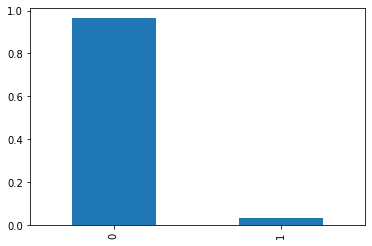

In [55]:
df2['target'].value_counts(normalize=True).plot(kind='bar');

### OVERSAMPLING

**Oversampling** means to increase the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

**Consider testing over-sampling when you don’t have a lot of data (tens of thousands of records or less).**

`Advantages:`
- Unlike undersampling this method leads to no information loss
- Outperforms undersampling
 
`Disadvantages:`
- It increases the likelihood of overfitting since it replicates the minority class events

In [ ]:
!pip install imblearn

In [65]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

features = df2.columns[df2.columns != 'target']
target = 'target'


X = df2[features]
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=1)

ros= RandomOverSampler(sampling_strategy='auto')

X_train, y_train = ros.fit_resample(X_train, y_train)

X_train, X_val, y_train, y_val = train_test_split(X_train.copy(), y_train.copy(), test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

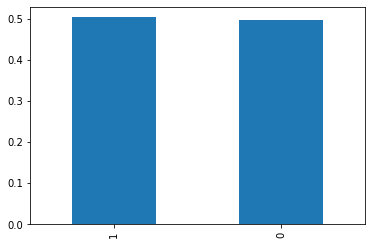

In [66]:
y_train.value_counts(normalize=True).plot(kind='bar');

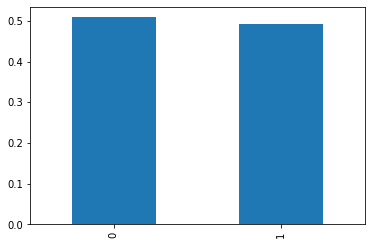

In [67]:
y_val.value_counts(normalize=True).plot(kind='bar');

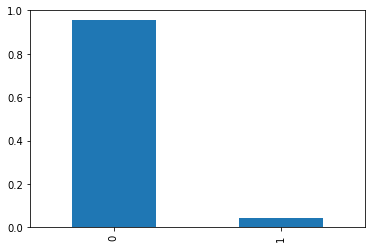

In [68]:
y_test.value_counts(normalize=True).plot(kind='bar');

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [70]:
clf = RandomForestClassifier(n_estimators=25)

In [72]:
clf.fit(X_train, y_train)

y_predict = clf.predict(X_val)

In [73]:
print(round(accuracy_score(y_val, y_predict),3))

0.993


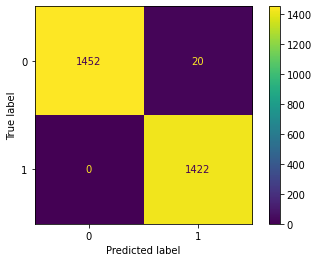

In [74]:
plot_confusion_matrix(clf, X_val, y_val);

In [75]:
y_test_predict = clf.predict(X_test)

In [76]:
print(round(accuracy_score(y_test, y_test_predict),3))

0.973


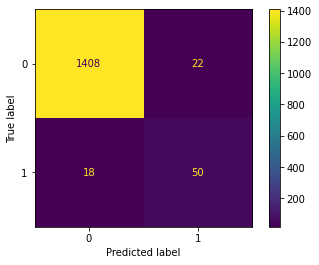

In [77]:
plot_confusion_matrix(clf, X_test, y_test);

In [78]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1430
           1       0.69      0.74      0.71        68

    accuracy                           0.97      1498
   macro avg       0.84      0.86      0.85      1498
weighted avg       0.97      0.97      0.97      1498



## CONCLUSION and whats Next

- after we split the data we oversample the minority class only on the `train` set
- we use validation set to check the model before we test it
- the test result was high enough and good based on the baseline 
- the accuracy was `99%` with a recall 74 and 69 precision for the minority class 

- we tend to believe that we got an overfit (probably) due to the oversampling method that we used
- we can get higher score for the minority class by tunning our model .
- the next step will be to reduce the overfit by choosing other features / using other method for our imbalanced data. maybe other algo. 
- other possibility is that we didnt limit our dt's in the rf algo wich almost all the time lead to overfit when the depth is to big so by tunnig the algo we can reduce the overfit .
